## Removemos valores ausentes e normalizamos os dados.

# Carregar o dataset corretamente


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
wine_df = pd.read_csv("wine.csv")
print(wine_df.head())

   class_label class_name  alcohol  malic_acid   ash  alcalinity_of_ash  \
0            1     Barolo      NaN        1.71  2.43               15.6   
1            1     Barolo    13.20        1.78  2.14               11.2   
2            1     Barolo    13.16        2.36  2.67               18.6   
3            1     Barolo    14.37        1.95  2.50               16.8   
4            1     Barolo    13.24        2.59  2.87               21.0   

   magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
0        127           2.80        3.06                  0.28   
1        100           2.65        2.76                  0.26   
2        101           2.80        3.24                  0.30   
3        113           3.85        3.49                  0.24   
4        118           2.80        2.69                  0.39   

   proanthocyanins  color_intensity   hue  od280  proline  
0             2.29             5.64  1.04   3.92     1065  
1             1.28             4.38  1

In [24]:

# Carregar o dataset corretamente
wine_df = pd.read_csv("wine.csv")


# Remover espaços extras nos nomes das colunas
wine_df.columns = wine_df.columns.str.strip()

# Verificar valores ausentes
print("\nValores ausentes antes do tratamento:")
print(wine_df.isnull().sum())




Valores ausentes antes do tratamento:
class_label             0
class_name              0
alcohol                 6
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64


In [23]:
# Preencher valores ausentes com a média
wine_df["alcohol"] = wine_df["alcohol"].fillna(wine_df["alcohol"].mean())

# Verificar novamente os valores ausentes
print("\nValores ausentes depois do tratamento:")
print(wine_df.isnull().sum())

# Selecionar apenas colunas numéricas para o K-Means
features = wine_df.drop(columns=["class_label", "class_name"])

# Normalizar os dados para melhorar a performance do K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)



Valores ausentes depois do tratamento:
class_label             0
class_name              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64


## Escolha do número de clusters (k): Método do Cotovelo

### Geramos o gráfico de inércia para encontrar o ponto ideal onde a redução estabiliza.



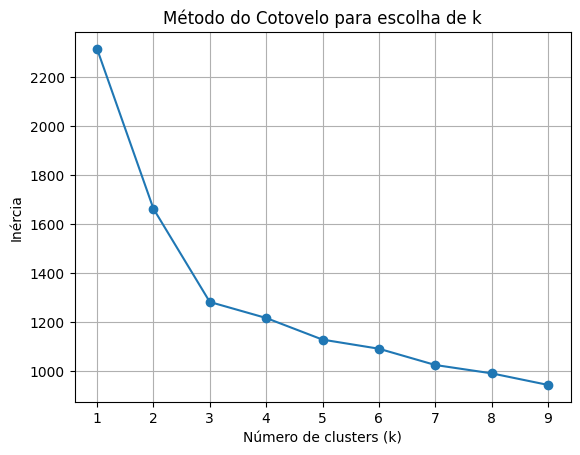

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Testar diferentes valores de k
inertia = []
k_values = range(1, 10)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Plotar o método do cotovelo
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo para escolha de k")
plt.grid(True)
plt.show()


## Execução do K-Means com k adequado
### Aqui aplicamos o K-Means utilizando o número ideal de clusters (k).

In [30]:
# Definir o valor ótimo de k baseado no método do cotovelo
k_optimal = 3  # Exemplo baseado na análise visual do gráfico

# Aplicar K-Means
model = KMeans(n_clusters=k_optimal, random_state=42)
wine_df["cluster"] = model.fit_predict(X_scaled)


## Validação dos clusters

### Rótulos verdadeiros (class_name), utilizamos a crosstab para verificar a correspondência entre clusters e classes reais.

In [31]:
# Validar clusters usando Crosstab (caso os rótulos estejam disponíveis)
crosstab = pd.crosstab(df["cluster"], df["class_name"])
print("\nTabela de contingência entre clusters e classes reais:")
print(crosstab)



Tabela de contingência entre clusters e classes reais:
class_name  Barbera  Barolo  Grignolino
cluster                                
0                 0       0          64
1                48       0           3
2                 0      59           4


## Testando outras métricas para validar a escolha do número de clusters (k)

### Silhouette Score
- Essa métrica mede a qualidade dos clusters avaliando o quão bem cada ponto está agrupado dentro de seu cluster e distante dos outros grupos.

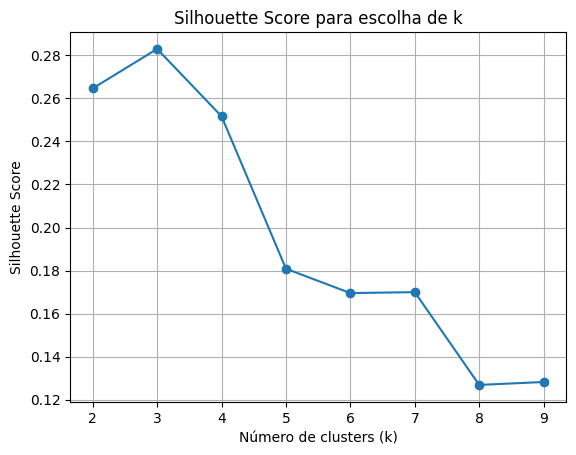

In [32]:
from sklearn.metrics import silhouette_score

# Calcular o Silhouette Score para diferentes valores de k
silhouette_scores = []
k_values = range(2, 10)  # Começamos em 2, pois com k=1 não há agrupamento

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plotar os resultados
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score para escolha de k")
plt.grid(True)
plt.show()


### Davies-Bouldin Index
- Essa métrica avalia a separação e a compactação dos clusters. Quanto menor o valor, melhor a escolha de k.

In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

wine_df = pd.read_csv("wine.csv")
# Selecionar apenas colunas numéricas para o K-Means
features = wine_df.drop(columns=["class_label", "class_name"])  # Agora está correto!

# Normalizar os dados para melhorar a performance do K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


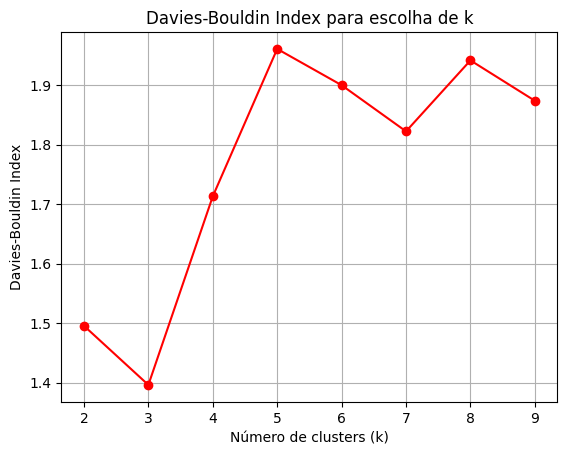

In [21]:
from sklearn.metrics import davies_bouldin_score
X_scaled = X_scaled[~pd.DataFrame(X_scaled).isnull().any(axis=1)]
import numpy as np

# Verificar e preencher valores ausentes com a média
features = wine_df.drop(columns=["class_label", "class_name"])
features.fillna(features.mean(), inplace=True)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


davies_scores = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = davies_bouldin_score(X_scaled, labels)
    davies_scores.append(score)

# Plotar os resultados
plt.plot(k_values, davies_scores, marker="o", color="red")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index para escolha de k")
plt.grid(True)
plt.show()



### Calinski-Harabasz Index (Score de variância)
- Essa métrica avalia o quão dispersos os clusters estão em relação à sua compactação interna.

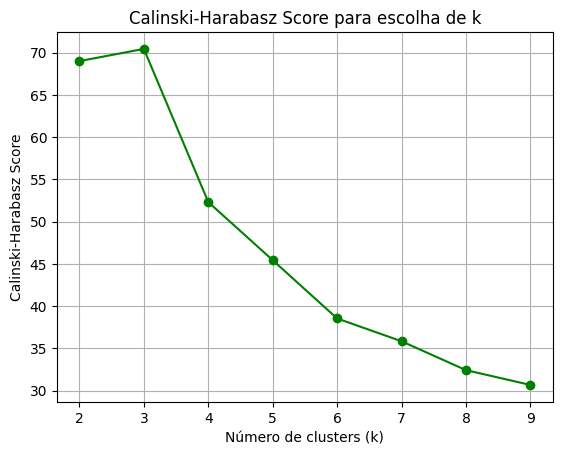

In [22]:
from sklearn.metrics import calinski_harabasz_score

calinski_scores = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, labels)
    calinski_scores.append(score)

# Plotar os resultados
plt.plot(k_values, calinski_scores, marker="o", color="green")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.title("Calinski-Harabasz Score para escolha de k")
plt.grid(True)
plt.show()
